In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import piecewise_regression
import re
from ast import literal_eval
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj][0]
# ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [24]:
df = pd.read_csv('all_data_fitting.csv')
df['Polymer Concentration (wt%)'] = df['Polymer Concentration Corrected (wtfrac)']*100
df

,Sample,Polymer Concentration (wt%),Polymer Concentration Corrected (wtfrac),Mixing Height and Lift Adjusted,Heated Container,Heated Block,Heating Block Temperature ?,Rest Time (days),Cast Position Adjusted,Lifting Delay,Fitting Success,Results,R Squared,Thickness,Date,Observations,Solution production notes
0,10_1,9.944972,0.099450,0,0,0,25,1,0,0,1,{'estimates': {'const': {'estimate': 0.0096600...,0.752200,0,2023-12-13,"Some volume loss, some sticky portions (not en...",Lost documentation
1,12_1_1,11.951042,0.119510,0,0,0,25,1,0,0,1,{'estimates': {'const': {'estimate': 0.2394400...,0.848445,0,2023-12-13,"Some volume loss, some sticky portions (not en...",Lost documentation
2,12_1_2,11.951042,0.119510,0,0,0,25,1,0,0,1,{'estimates': {'const': {'estimate': -1.097724...,0.859813,0,2023-12-13,"Some volume loss, some sticky portions (not en...",Lost documentation
3,15_1,14.980453,0.149805,0,0,0,25,1,0,0,1,{'estimates': {'const': {'estimate': -1.072676...,0.948122,0,2023-12-13,"Some volume loss, some sticky portions (not en...",Lost documentation
4,10_1_H,9.944972,0.099450,0,1,0,25,1,0,0,1,{'estimates': {'const': {'estimate': 0.6752411...,0.766467,0,2023-12-15,"Some volume loss, some sticky portions (not en...",Lost documentation
5,12_1_H,11.951042,0.119510,0,1,0,25,1,0,0,1,{'estimates': {'const': {'estimate': 0.3871722...,0.850577,0,2023-12-15,"Some volume loss, some sticky portions (not en...",Lost documentation
6,15_1_H,14.980453,0.149805,0,1,0,25,1,0,0,1,{'estimates': {'const': {'estimate': -0.219821...,0.857936,0,2023-12-15,"Some volume loss, some sticky portions (not en...",Lost documentation
7,17_1_H,17.000000,0.170000,0,1,0,25,1,0,0,1,{'estimates': {'const': {'estimate': 0.3913324...,0.967954,0,2023-12-15,"Some volume loss, some sticky portions (not en...",Lost documentation
8,10_2,10.068121,0.100681,1,0,0,25,1,0,0,1,{'estimates': {'const': {'estimate': 0.8478852...,0.807905,0,2024-02-01,"No significant volume loss, no wrinkles",NaN
9,12_2,12.058193,0.120582,1,0,0,25,1,0,0,1,{'estimates': {'const': {'estimate': 0.9764563...,0.842921,0,2024-02-01,"No significant volume loss, no wrinkles",NaN


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import numpy as np

# Check for missing values and df types
missing_values = df.isnull().sum()
df_types = df.dtypes

# Convert 'R Squared' to a numerical format if it's not already
df['R Squared'] = pd.to_numeric(df['R Squared'], errors='coerce')

# Drop rows with missing target values
df.dropna(subset=['R Squared'], inplace=True)

# Prepare the feature matrix (X) and target vector (y)
X = df[['Polymer Concentration (wt%)','Mixing Height and Lift Adjusted', 'Heated Container','Heated Block', 'Rest Time (days)', 'Cast Position Adjusted']]
y = df['R Squared']

# Split the dfset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

missing_values, df_types, r2

(Sample                                       0
 Polymer Concentration (wt%)                  0
 Polymer Concentration Corrected (wtfrac)     0
 Mixing Height and Lift Adjusted              0
 Heated Container                             0
 Heated Block                                 0
 Heating Block Temperature ?                  0
 Rest Time (days)                             0
 Cast Position Adjusted                       0
 Lifting Delay                                0
 Fitting Success                              0
 Results                                      0
 R Squared                                    0
 Thickness                                    4
 Date                                         0
 Observations                                 1
 Solution production notes                   25
 dtype: int64,
 Sample                                       object
 Polymer Concentration (wt%)                 float64
 Polymer Concentration Corrected (wtfrac)    float64
 Mixing He

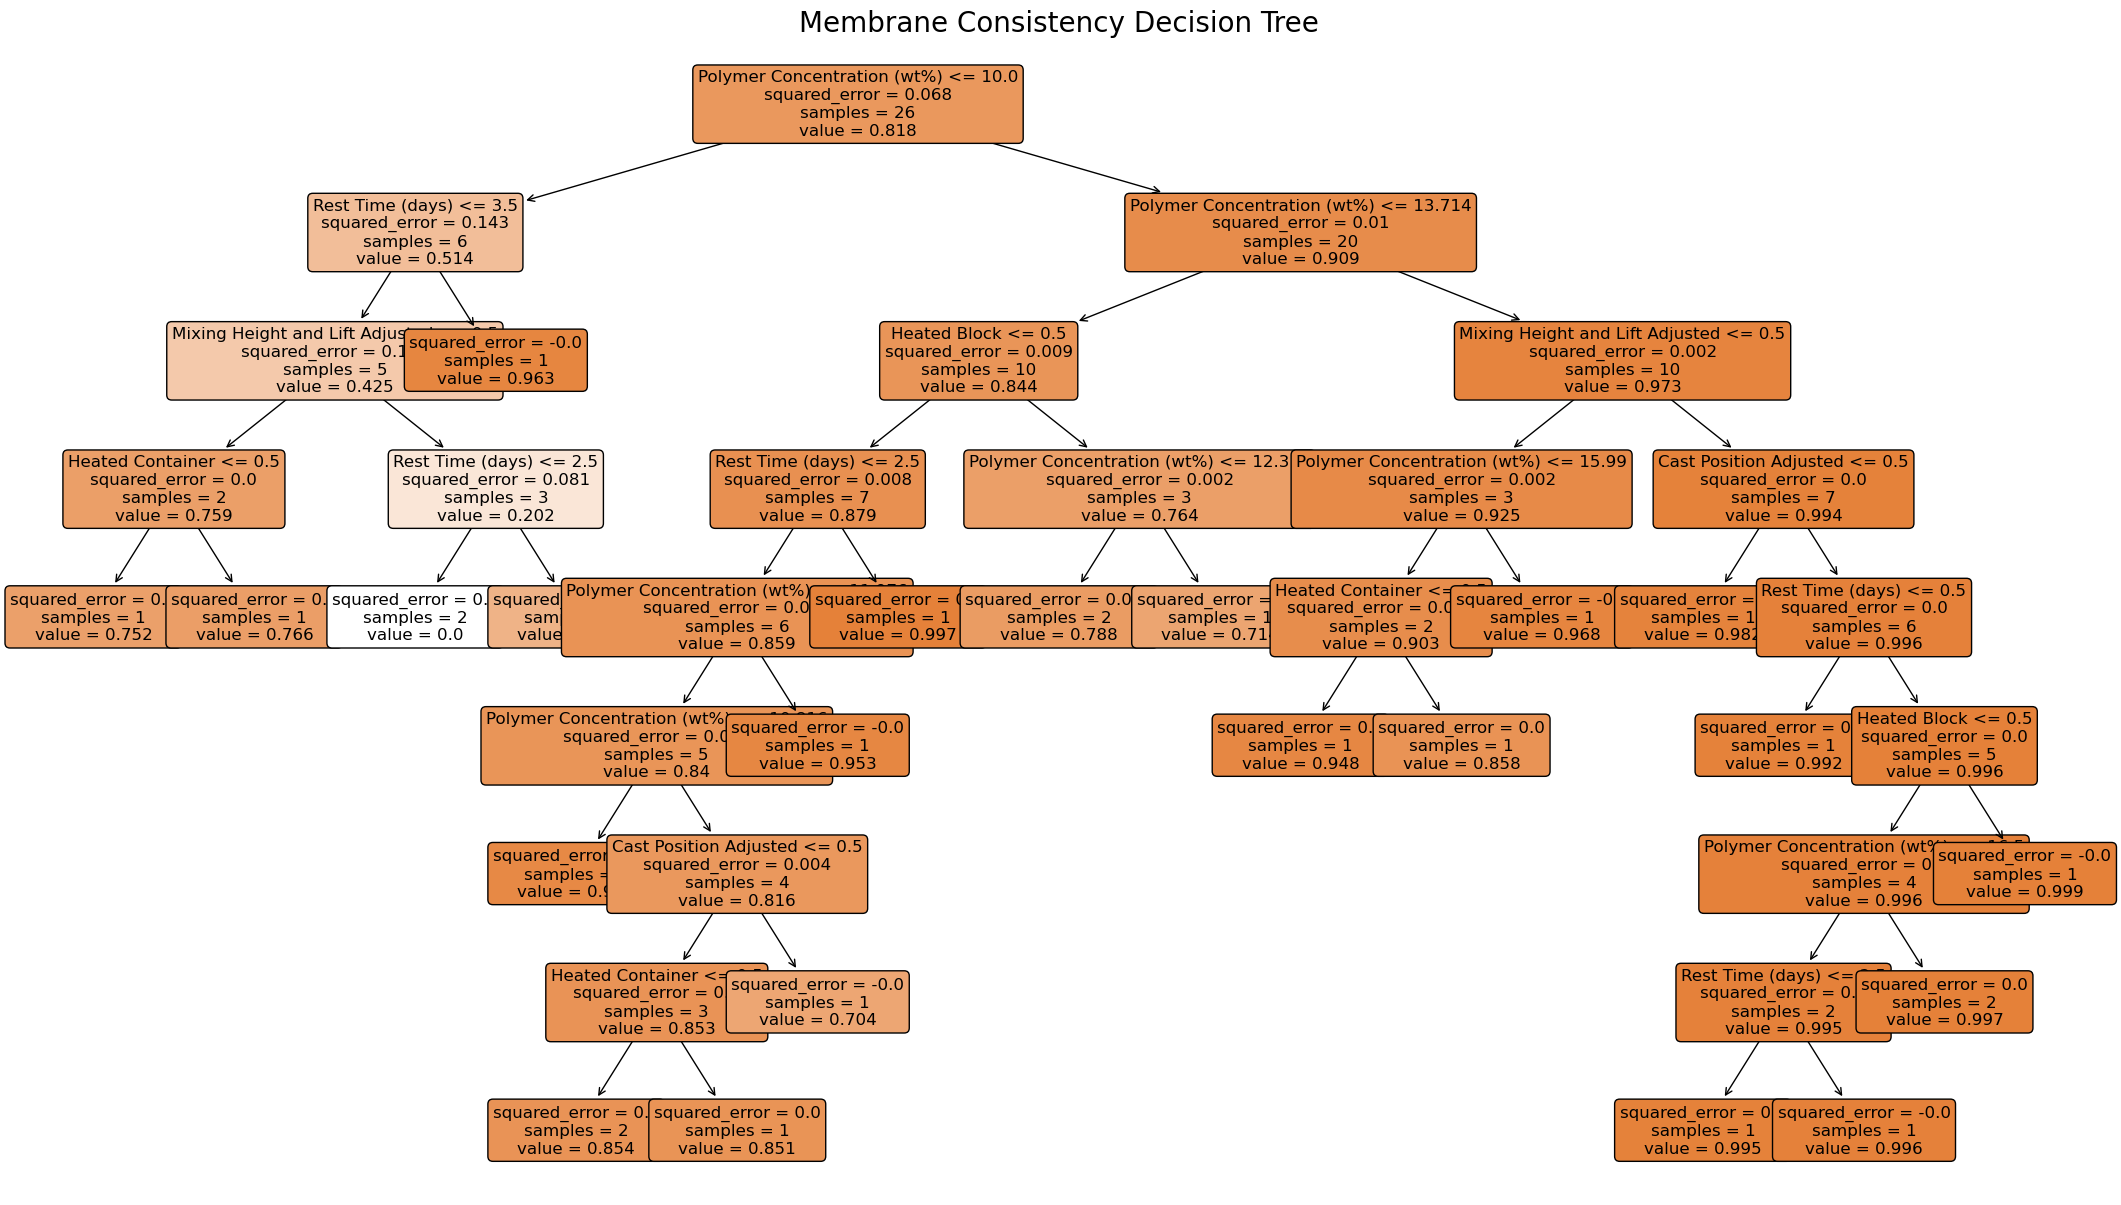

In [26]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set the size of the plot
plt.figure(figsize=(27,15))

# Plot the decision tree
plot_tree(model, 
          feature_names=X_train.columns, 
          class_names='R Squared',
          filled=True, 
          rounded=True, 
          fontsize=12)

# Show the plot
plt.title('Membrane Consistency Decision Tree', fontsize=20)
plt.show()


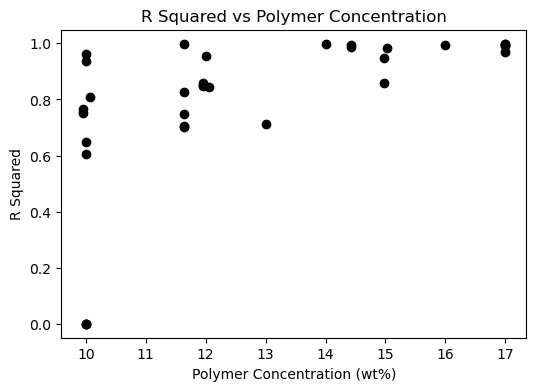

In [27]:
# plot r squared vs polymer concentration
plt.figure(figsize=(6,4))
plt.scatter(df['Polymer Concentration (wt%)'], df['R Squared'], color='black')
plt.title('R Squared vs Polymer Concentration')
plt.xlabel('Polymer Concentration (wt%)')
plt.ylabel('R Squared')
plt.show()


# Modulus

In [28]:
#df = pd.read_csv('all_data_fitting.csv')
# drop the rows with that says "failed" in "Results" column
df = df[df['Results'] != 'failed'].reset_index(drop=True)
# drop nan values in "Results" column
df = df.dropna(subset=['Results']).reset_index(drop=True)
df['Results'] = df['Results'].apply(literal_eval)
df

,Sample,Polymer Concentration (wt%),Polymer Concentration Corrected (wtfrac),Mixing Height and Lift Adjusted,Heated Container,Heated Block,Heating Block Temperature ?,Rest Time (days),Cast Position Adjusted,Lifting Delay,Fitting Success,Results,R Squared,Thickness,Date,Observations,Solution production notes
0,10_1,9.944972,0.099450,0,0,0,25,1,0,0,1,{'estimates': {'const': {'estimate': 0.0096600...,0.752200,0,2023-12-13,"Some volume loss, some sticky portions (not en...",Lost documentation
1,12_1_1,11.951042,0.119510,0,0,0,25,1,0,0,1,{'estimates': {'const': {'estimate': 0.2394400...,0.848445,0,2023-12-13,"Some volume loss, some sticky portions (not en...",Lost documentation
2,12_1_2,11.951042,0.119510,0,0,0,25,1,0,0,1,{'estimates': {'const': {'estimate': -1.097724...,0.859813,0,2023-12-13,"Some volume loss, some sticky portions (not en...",Lost documentation
3,15_1,14.980453,0.149805,0,0,0,25,1,0,0,1,{'estimates': {'const': {'estimate': -1.072676...,0.948122,0,2023-12-13,"Some volume loss, some sticky portions (not en...",Lost documentation
4,10_1_H,9.944972,0.099450,0,1,0,25,1,0,0,1,{'estimates': {'const': {'estimate': 0.6752411...,0.766467,0,2023-12-15,"Some volume loss, some sticky portions (not en...",Lost documentation
5,12_1_H,11.951042,0.119510,0,1,0,25,1,0,0,1,{'estimates': {'const': {'estimate': 0.3871722...,0.850577,0,2023-12-15,"Some volume loss, some sticky portions (not en...",Lost documentation
6,15_1_H,14.980453,0.149805,0,1,0,25,1,0,0,1,{'estimates': {'const': {'estimate': -0.219821...,0.857936,0,2023-12-15,"Some volume loss, some sticky portions (not en...",Lost documentation
7,17_1_H,17.000000,0.170000,0,1,0,25,1,0,0,1,{'estimates': {'const': {'estimate': 0.3913324...,0.967954,0,2023-12-15,"Some volume loss, some sticky portions (not en...",Lost documentation
8,10_2,10.068121,0.100681,1,0,0,25,1,0,0,1,{'estimates': {'const': {'estimate': 0.8478852...,0.807905,0,2024-02-01,"No significant volume loss, no wrinkles",NaN
9,12_2,12.058193,0.120582,1,0,0,25,1,0,0,1,{'estimates': {'const': {'estimate': 0.9764563...,0.842921,0,2024-02-01,"No significant volume loss, no wrinkles",NaN


In [29]:
def get_1st_slope(results):
    slope = results['estimates']['alpha1']['estimate']
    return slope
# get the 1st slope
df['1st slope'] = df['Results'].apply(get_1st_slope)

In [30]:
def get_1st_slope_se(results):
    slope_se = results['estimates']['alpha1']['se']
    return slope_se
# get the 1st slope
df['1st slope se'] = df['Results'].apply(get_1st_slope_se)

In [31]:
df

,Sample,Polymer Concentration (wt%),Polymer Concentration Corrected (wtfrac),Mixing Height and Lift Adjusted,Heated Container,Heated Block,Heating Block Temperature ?,Rest Time (days),Cast Position Adjusted,Lifting Delay,Fitting Success,Results,R Squared,Thickness,Date,Observations,Solution production notes,1st slope,1st slope se
0,10_1,9.944972,0.099450,0,0,0,25,1,0,0,1,{'estimates': {'const': {'estimate': 0.0096600...,0.752200,0,2023-12-13,"Some volume loss, some sticky portions (not en...",Lost documentation,0.152088,0.019073
1,12_1_1,11.951042,0.119510,0,0,0,25,1,0,0,1,{'estimates': {'const': {'estimate': 0.2394400...,0.848445,0,2023-12-13,"Some volume loss, some sticky portions (not en...",Lost documentation,0.295554,0.070334
2,12_1_2,11.951042,0.119510,0,0,0,25,1,0,0,1,{'estimates': {'const': {'estimate': -1.097724...,0.859813,0,2023-12-13,"Some volume loss, some sticky portions (not en...",Lost documentation,0.706767,0.009829
3,15_1,14.980453,0.149805,0,0,0,25,1,0,0,1,{'estimates': {'const': {'estimate': -1.072676...,0.948122,0,2023-12-13,"Some volume loss, some sticky portions (not en...",Lost documentation,0.812963,0.032187
4,10_1_H,9.944972,0.099450,0,1,0,25,1,0,0,1,{'estimates': {'const': {'estimate': 0.6752411...,0.766467,0,2023-12-15,"Some volume loss, some sticky portions (not en...",Lost documentation,0.222197,0.045629
5,12_1_H,11.951042,0.119510,0,1,0,25,1,0,0,1,{'estimates': {'const': {'estimate': 0.3871722...,0.850577,0,2023-12-15,"Some volume loss, some sticky portions (not en...",Lost documentation,0.361862,0.064222
6,15_1_H,14.980453,0.149805,0,1,0,25,1,0,0,1,{'estimates': {'const': {'estimate': -0.219821...,0.857936,0,2023-12-15,"Some volume loss, some sticky portions (not en...",Lost documentation,0.503277,0.045399
7,17_1_H,17.000000,0.170000,0,1,0,25,1,0,0,1,{'estimates': {'const': {'estimate': 0.3913324...,0.967954,0,2023-12-15,"Some volume loss, some sticky portions (not en...",Lost documentation,0.351043,0.079126
8,10_2,10.068121,0.100681,1,0,0,25,1,0,0,1,{'estimates': {'const': {'estimate': 0.8478852...,0.807905,0,2024-02-01,"No significant volume loss, no wrinkles",NaN,0.390180,0.082307
9,12_2,12.058193,0.120582,1,0,0,25,1,0,0,1,{'estimates': {'const': {'estimate': 0.9764563...,0.842921,0,2024-02-01,"No significant volume loss, no wrinkles",NaN,0.331536,0.135016


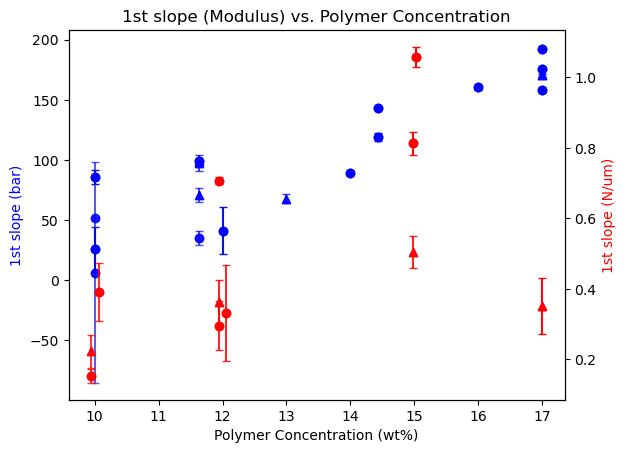

In [32]:
# plot 1st slope vs. polymer concentration and color code by r squared for those of thickness not 0, if the thickness is 0, plot those slopes in secondary y axis
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
for i in range(len(df)):
    # if heating block or container is off
    if df['Heated Block'][i] == 0 and df['Heated Container'][i] == 0:
        shape = 'o'
    # if heating block is on
    else: 
        shape = '^'
    if df['Thickness'][i] != '0':
        ax1.scatter(df['Polymer Concentration (wt%)'][i], df['1st slope'][i], marker = shape, color='b', alpha=df['R Squared'][i])
        # plot the error bar
        ax1.errorbar(df['Polymer Concentration (wt%)'][i], df['1st slope'][i], yerr=df['1st slope se'][i], fmt=shape,capsize=3,color='b', alpha=df['R Squared'][i])
    else:
        ax2.scatter(df['Polymer Concentration (wt%)'][i], df['1st slope'][i], marker = shape, color='r', alpha=df['R Squared'][i])
        # plot the error bar
        ax2.errorbar(df['Polymer Concentration (wt%)'][i], df['1st slope'][i], yerr=df['1st slope se'][i], fmt=shape,capsize=3, color='r', alpha=df['R Squared'][i])
    #print(i)
ax1.set_xlabel('Polymer Concentration (wt%)')
ax1.set_ylabel('1st slope (bar)', color='b')
ax2.set_ylabel('1st slope (N/um)', color='r')
plt.title('1st slope (Modulus) vs. Polymer Concentration')
plt.show()

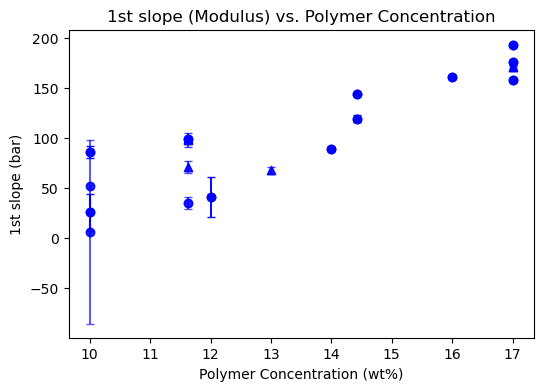

In [33]:
# plot 1st slope vs. polymer concentration and color code by r squared for those of thickness not 0, if the thickness is 0, plot those slopes in secondary y axis
fig, ax1 = plt.subplots(figsize=(6,4))
for i in range(len(df)):
    # if heating block or container is off
    if df['Heated Block'][i] == 0 and df['Heated Container'][i] == 0:
        shape = 'o'
    # if heating block is on
    else: 
        shape = '^'
    if df['Thickness'][i] != '0':
        ax1.scatter(df['Polymer Concentration (wt%)'][i], df['1st slope'][i], marker = shape, color='b', alpha=df['R Squared'][i])
        # plot the error bar
        ax1.errorbar(df['Polymer Concentration (wt%)'][i], df['1st slope'][i], yerr=df['1st slope se'][i], fmt=shape,capsize=3,color='b', alpha=df['R Squared'][i])

ax1.set_xlabel('Polymer Concentration (wt%)')
ax1.set_ylabel('1st slope (bar)')
plt.title('1st slope (Modulus) vs. Polymer Concentration')
plt.show()

In [24]:
def get_yield_stress(results):
    yield_strength_est = results['estimates']['const']['estimate']+results['estimates']['alpha1']['estimate']*results['estimates']['breakpoint1']['estimate']
    return yield_strength_est
def get_yield_stress_se(results):
    yield_strength_se = results['estimates']['const']['se']+results['estimates']['alpha1']['se']*results['estimates']['breakpoint1']['se']
    return yield_strength_se
# get the 1st slope
df['yield_stress']= df['Results'].apply(get_yield_stress)
df['yield_stress_se']= df['Results'].apply(get_yield_stress_se)
df

,Sample,Polymer Concentration (wt%),Polymer Concentration Corrected (wtfrac),Mixing Height and Lift Adjusted,Heated Container,Heated Block,Rest Time (days),Cast Position Adjusted,Fitting Success,Results,R Squared,Thickness,Date,Observations,Solution production notes,1st slope,1st slope se,yield_stress,yield_stress_se
0,10_1,9.944972,0.099450,0,0,0,1,0,1,{'estimates': {'const': {'estimate': 0.0096600...,0.752200,0,2023-12-13,"Some volume loss, some sticky portions (not en...",Lost documentation,0.152088,0.019073,5.829764,0.495080
1,12_1_1,11.951042,0.119510,0,0,0,1,0,1,{'estimates': {'const': {'estimate': 0.2394400...,0.848445,0,2023-12-13,"Some volume loss, some sticky portions (not en...",Lost documentation,0.295554,0.070334,4.256951,0.707567
2,12_1_2,11.951042,0.119510,0,0,0,1,0,1,{'estimates': {'const': {'estimate': -1.097724...,0.859813,0,2023-12-13,"Some volume loss, some sticky portions (not en...",Lost documentation,0.706767,0.009829,29.225093,0.251649
3,15_1,14.980453,0.149805,0,0,0,1,0,1,{'estimates': {'const': {'estimate': -1.072676...,0.948122,0,2023-12-13,"Some volume loss, some sticky portions (not en...",Lost documentation,0.812963,0.032187,12.081616,0.319976
4,10_1_H,9.944972,0.099450,0,1,0,1,0,1,{'estimates': {'const': {'estimate': 0.6752411...,0.766467,0,2023-12-15,"Some volume loss, some sticky portions (not en...",Lost documentation,0.222197,0.045629,5.295211,0.742114
5,12_1_H,11.951042,0.119510,0,1,0,1,0,1,{'estimates': {'const': {'estimate': 0.3871722...,0.850577,0,2023-12-15,"Some volume loss, some sticky portions (not en...",Lost documentation,0.361862,0.064222,5.118564,0.723777
6,15_1_H,14.980453,0.149805,0,1,0,1,0,1,{'estimates': {'const': {'estimate': -0.219821...,0.857936,0,2023-12-15,"Some volume loss, some sticky portions (not en...",Lost documentation,0.503277,0.045399,8.585042,0.523460
7,17_1_H,17.000000,0.170000,0,1,0,1,0,1,{'estimates': {'const': {'estimate': 0.3913324...,0.967954,0,2023-12-15,"Some volume loss, some sticky portions (not en...",Lost documentation,0.351043,0.079126,3.286929,0.496507
8,10_2,10.068121,0.100681,1,0,0,1,0,1,{'estimates': {'const': {'estimate': 0.8478852...,0.807905,0,2024-02-01,"No significant volume loss, no wrinkles",NaN,0.390180,0.082307,5.574228,1.280277
9,12_2,12.058193,0.120582,1,0,0,1,0,1,{'estimates': {'const': {'estimate': 0.9764563...,0.842921,0,2024-02-01,"No significant volume loss, no wrinkles",NaN,0.331536,0.135016,4.038204,1.345868


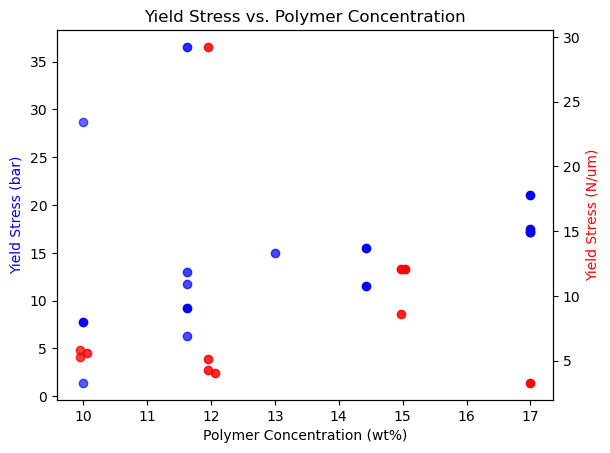

In [23]:
# do the same plot for yield stress
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
for i in range(len(df)):
    if df['Thickness'][i] != '0':
        ax1.scatter(df['Polymer Concentration (wt%)'][i], df['yield_stress'][i], color='b', alpha=df['R Squared'][i])
    else:
        ax2.scatter(df['Polymer Concentration (wt%)'][i], df['yield_stress'][i], color='r', alpha=df['R Squared'][i])
    #print(i)
ax1.set_xlabel('Polymer Concentration (wt%)')
ax1.set_ylabel('Yield Stress (bar)', color='b')
ax2.set_ylabel('Yield Stress (N/um)', color='r')
plt.title('Yield Stress vs. Polymer Concentration')
plt.show()

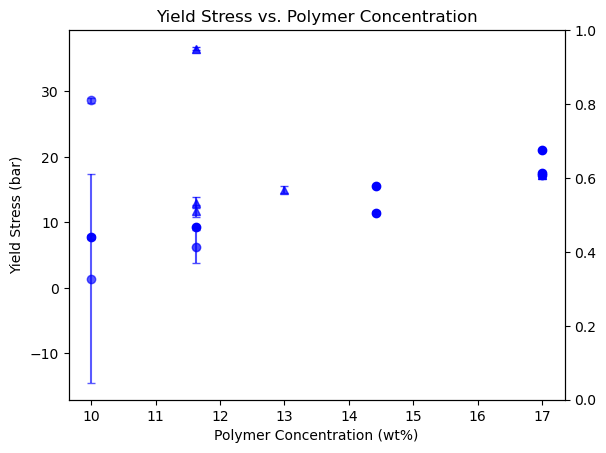

In [26]:
# do the same plot for yield stress
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
for i in range(len(df)):
    # if heating block or container is off
    if df['Heated Block'][i] == 0 and df['Heated Container'][i] == 0:
        shape = 'o'
    # if heating block is on
    else: 
        shape = '^'
    if df['Thickness'][i] != '0':
        ax1.errorbar(df['Polymer Concentration (wt%)'][i], df['yield_stress'][i], yerr=df['yield_stress_se'][i], fmt=shape,capsize=3,color='b', alpha=df['R Squared'][i])

ax1.set_xlabel('Polymer Concentration (wt%)')
ax1.set_ylabel('Yield Stress (bar)')
plt.title('Yield Stress vs. Polymer Concentration')
plt.show()

In [74]:
df['Results'][0]['estimates']['alpha1']['estimate']

0.15208775906852737